# PHYS481 Game of life animation and objects

https://pypi.org/project/ipython-animated-array

https://github.com/airtoxin/ipython-animated-array

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

https://www.numfys.net/howto/animations/

https://towardsdatascience.com/interactive-visualizations-in-jupyter-notebook-3be02ab2b8cd


https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook

Some options you have for animating plots in Jupyter/IPython, using matplotlib:

## Using display in a loop 

Use IPython.display.display(fig) to display a figure in the output. Using a loop you would want to clear the output before a new figure is shown. Note that this technique gives in general not so smooth results. I would hence advice to use any of the below.


### %matplotlib notebook 
Use IPython magic %matplotlib notebook to set the backend to the notebook backend. This will keep the figure alive instead of displaying a static png file and can hence also show animations.


### %matplotlib tk
Use IPython magic %matplotlib tk to set the backend to the tk backend. This will open the figure in a new plotting window, which is interactive and can thus also show animations.


### Convert animation to mp4 video (option mentionned by @Perfi already):

from IPython.display import HTML
HTML(ani.to_html5_video())

or use plt.rcParams["animation.html"] = "html5" at the beginning of the notebook. This will require to have ffmpeg video codecs available to convert to HTML5 video. The video is then shown inline. This is therefore compatible with %matplotlib inline backend. Complete example:


### Convert animation to JavaScript:

from IPython.display import HTML
HTML(ani.to_jshtml())

or use plt.rcParams["animation.html"] = "jshtml" at the beginning of the notebook. This will display the animation as HTML with JavaScript. This highly compatible with most new browsers and also with the %matplotlib inline backend. It is available in matplotlib 2.1 or higher.

In [6]:
%matplotlib notebook

# notebook display engine supports animation (inline does not)
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import time

from IPython.display import HTML, display

<IPython.core.display.Javascript object>


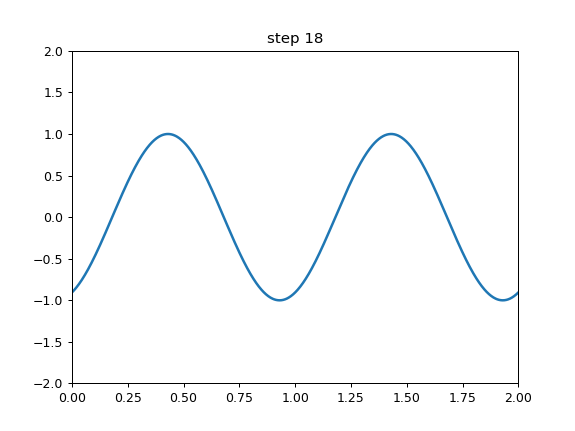

In [7]:
def animate_canvas(nsteps=9, delay=0.1):
    
    fig, ax = plt.subplots()
    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))
    line, = ax.plot([], [], lw=2)

    for i in range(nsteps):
    
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        ax.set_title("step {:2.2}".format(str(i)))

        fig.canvas.draw() 
        fig.canvas.flush_events() 
        time.sleep(delay)
        
result = animate_canvas(nsteps=19)        

<IPython.core.display.Javascript object>


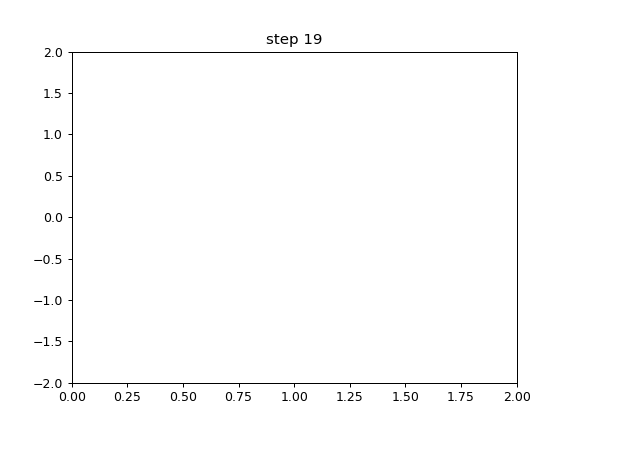

In [8]:
fig, ax = plt.subplots()
ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    ax.set_title("step {:2.2}".format(str(i)))
    return (line,)

#rc('animation', html='jshtml')
anim = animation.FuncAnimation(fig, animate, init_func=init,
            frames=20, interval=150, blit=True, repeat=False)

time.sleep(1)
result = anim._stop()  #private method to clear timer callback

In [9]:
#anim.event_source.stop()
#anim = 0

anim = animation.FuncAnimation(fig, animate, 
        init_func=init, frames=20, interval=150, blit=True)

# equivalent to rcParams['animation.html'] = 'jshtml'
rc('animation', html='jshtml')
result = HTML(anim.to_jshtml())
time.sleep(0.1)
anim._stop()